**<font size = 5>主題：卷積神經網路-手寫辨識</font>**

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#讀入MNIST數據
from keras.datasets import mnist

Using TensorFlow backend.
C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [4]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()
#(x_train,x_test), (y_train,y_test) = mnist.load_data() #測試

In [5]:
#len(x_train)

In [6]:
#len(x_test)

**1.輸入出格式整理**

CNN 輸入資料都是 28x28 的陣列，而平常的圖都有 R, G, B 三個 channels, 每個 channel 都是一個矩陣, 也就是一張圖可能是三個矩陣。MNIST的資料是灰階, 也就是只有一個 channel。

需將輸入每筆資料型式要從 (28, 28) 換成 (28, 28, 1)

In [7]:
x_train = x_train.reshape(60000,28,28,1) #60000個->28個->28列,1行
x_test = x_test.reshape(10000,28,28,1)

In [8]:
x_train[1]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [9]:
x_train[1].shape

(28, 28, 1)

In [11]:
x = x_train[1][:,:,0] #變回畫圖用28*28
x.shape # -> (28,28)
x

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

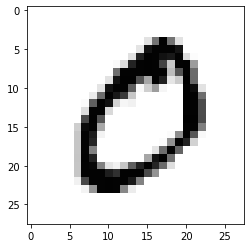

In [19]:
plt.imshow(x, cmap='Greys')

In [37]:
#輸出資料
from keras.utils import np_utils

In [38]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

**2.決定神經網路架構，讀入相關套件**

需決定要用幾層的 CNN, 然後是不是每次都要做 max-pooling。再來就是拉平成向量、送入標準神經網路 (再度要決定幾層、幾個神經元)。

1.做 3 次 convolution, 每次都接 max-pooling

2.filter 大小都是 3x3, max-pooling 都用 2x2 為一小區塊

CNN 是每層的 filters 數目要越來越多。做完 convolution 之後要拉平、再送入一個標準的神經網路。這個神經網路設計是這樣:

1.1 個隱藏層, 使用 200 個神經元。

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [54]:
model = Sequential() #空白神經網路

In [55]:
#設定convolution，設filter個數 32，大小是3*3，padding = 'same'代表大小相同28*28
model.add(Conv2D(32,(3,3), padding = 'same', input_shape=(28,28,1)))
model.add(Activation('relu'))

In [56]:
#max-pooling，pool大小為2*2
model.add(MaxPooling2D(pool_size=(2,2)))

In [57]:
#第二次convolution，filter個數 64
model.add(Conv2D(64,(3,3), padding = 'same'))
model.add(Activation('relu'))

In [58]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [59]:
model.add(Conv2D(128,(3,3), padding = 'same'))
model.add(Activation('relu'))

In [60]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [61]:
#標準神經網路需輸入向量(非28*28之矩陣)
model.add(Flatten()) #拉平變成向量
model.add(Dense(200)) #200個神經元
model.add(Activation('relu'))

In [62]:
#輸出
model.add(Dense(10))
model.add(Activation('softmax'))

In [63]:
#組裝神經網路
model.compile(loss='mse', optimizer=SGD(lr=0.05),metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)        

In [67]:
#參數320，filter大小3*3，共32個，所以也有32個Bias
3*3*32+32

320

In [75]:
#230600
1152*200+200

230600

In [77]:
model.fit(x_train,y_train,batch_size=100, epochs=12)

Epoch 1/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0044 - accuracy: 0.9718
Epoch 2/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0033 - accuracy: 0.9786
Epoch 3/12
60000/60000 [==============================] - 56s 938us/step - loss: 0.0027 - accuracy: 0.9825
Epoch 4/12
60000/60000 [==============================] - 56s 931us/step - loss: 0.0023 - accuracy: 0.9857
Epoch 5/12
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0020 - accuracy: 0.9876
Epoch 6/12
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0017 - accuracy: 0.9898
Epoch 7/12
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0015 - accuracy: 0.9906
Epoch 8/12
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0013 - accuracy: 0.9923
Epoch 9/12
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0012 - accuracy: 0.9929 0s - loss: 0.0012 - accu
Epoch 10/12
60000/60000 [=

In [78]:
#結果分數
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 395us/step


In [80]:
print('loss:',score[0])
print('正確率:',score[1])

loss: 0.00229661483212031
正確率: 0.9857000112533569


In [81]:
#儲存結果
model_json = model.to_json()
open('CNN_handwriting.json','w').write(model_json)
model.save_weights('CNN_handwriting_weight.h5')

In [82]:
predict = model.predict_classes(x_test)

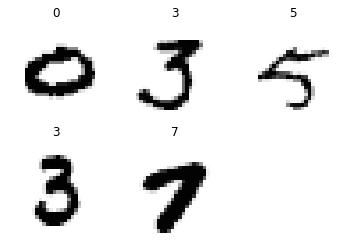

In [95]:
#隨機挑5個數字
pick = np.random.randint(1,9999, 6)

for i in range(5):
    plt.subplot(2,3,i+1) #subplot(nrows, ncols, index) index starts at 1 in the upper left corner and increases to the right.
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")